# Basic Neural Network - Feed Forward

![BasicNN](basic-nn.png "Basic Neural Network")

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Input samples. e.g.:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

print("X and y matrices before normalization")
print(X)
print(y)

# Normalize x and y values:
# Scale our data taking advantage of the fact that all data is positive.
# Just divide by the maximum value for each variable, effectively scaling the result between 0 and 1.
X /= np.amax(X, axis=0)
# Another way of normalizing
#X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0) - np.amin(X, axis=0))
y = y/100

print("X and y matrices AFTER normalization")
print(X)
print(y)

class Neural_Network(object):
    SIGMOID, RELU = range(2)
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X, non_linear=RELU):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        print("X x W1:")
        print(self.z2)
        if (non_linear == self.RELU):
            print("Applying RELU in layer 1. A2:")
            self.a2 = self.relu(self.z2)
        else:
            print("Applying SIG in layer 1. A2:")
            self.a2 = self.sigmoid(self.z2)
        print(self.a2)
        self.z3 = np.dot(self.a2, self.W2)
        print("A2 x W2:")
        print(self.z3)
        if (non_linear == self.RELU):
            print("Applying RELU in layer 2. YHat:")
            yHat = self.relu(self.z3)
        else:
            print("Applying SIG in layer 2. YHat:")
            yHat = self.sigmoid(self.z3)
        print(yHat)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def relu(self, z):
        return np.maximum(z, 0)
        #return z * (z > 0)
        # Another method: return np.maximum(z, 0)


X and y matrices before normalization
[[  3.   5.]
 [  5.   1.]
 [ 10.   2.]]
[[ 75.]
 [ 82.]
 [ 93.]]
X and y matrices AFTER normalization
[[ 0.3  1. ]
 [ 0.5  0.2]
 [ 1.   0.4]]
[[ 0.75]
 [ 0.82]
 [ 0.93]]


# NN Creation and Forward Pass Execution

In [117]:
NN = Neural_Network()
yHat = NN.forward(X)

X x W1:
[[ 0.75837322  0.44627263  0.86060657]
 [-0.55177635 -0.24685686  0.50613464]
 [-1.10355271 -0.49371372  1.01226927]]
Applying RELU in layer 1. A2:
[[ 0.75837322  0.44627263  0.86060657]
 [ 0.          0.          0.50613464]
 [ 0.          0.          1.01226927]]
A2 x W2:
[[-1.15046901]
 [ 0.38865099]
 [ 0.77730197]]
Applying RELU in layer 2. YHat:
[[ 0.        ]
 [ 0.38865099]
 [ 0.77730197]]


# Main Non-Linear Functions

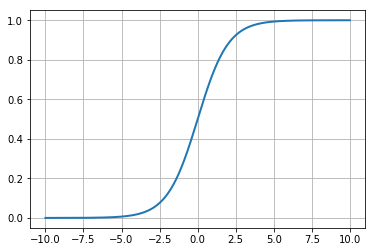

In [126]:
testInput = np.arange(-10,10,0.01)
plt.plot(testInput, NN.sigmoid(testInput), linewidth= 2)
plt.grid(1)
plt.show()

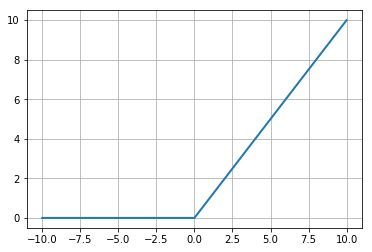

In [127]:
testInput = np.arange(-10,10,0.01)
plt.plot(testInput, NN.relu(testInput), linewidth= 2)
plt.grid(1)
plt.show()